In [1]:
from hyperts import HyperTS
from hyperts.utils import consts, get_tool_box
from hyperts.datasets import load_basic_motions

#### 1. Load Data

In [2]:
df = load_basic_motions()

#### 2. Look at the data

In [3]:
df.head()

,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,target
0,0 0.079106 1 0.079106 2 -0.903497 3...,0 0.394032 1 0.394032 2 -3.666397 3...,0 0.551444 1 0.551444 2 -0.282844 3...,0 0.351565 1 0.351565 2 -0.095881 3...,0 0.023970 1 0.023970 2 -0.319605 3...,0 0.633883 1 0.633883 2 0.972131 3...,standing
1,0 0.377751 1 0.377751 2 2.952965 3...,0 -0.610850 1 -0.610850 2 0.970717 3...,0 -0.147376 1 -0.147376 2 -5.962515 3...,0 -0.103872 1 -0.103872 2 -7.593275 3...,0 -0.109198 1 -0.109198 2 -0.697804 3...,0 -0.037287 1 -0.037287 2 -2.865789 3...,standing
2,0 -0.813905 1 -0.813905 2 -0.424628 3...,0 0.825666 1 0.825666 2 -1.305033 3...,0 0.032712 1 0.032712 2 0.826170 3...,0 0.021307 1 0.021307 2 -0.372872 3...,0 0.122515 1 0.122515 2 -0.045277 3...,0 0.775041 1 0.775041 2 0.383526 3...,standing
3,0 0.289855 1 0.289855 2 -0.669185 3...,0 0.284130 1 0.284130 2 -0.210466 3...,0 0.213680 1 0.213680 2 0.252267 3...,0 -0.314278 1 -0.314278 2 0.018644 3...,0 0.074574 1 0.074574 2 0.007990 3...,0 -0.079901 1 -0.079901 2 0.237040 3...,standing
4,0 -0.123238 1 -0.123238 2 -0.249547 3...,0 0.379341 1 0.379341 2 0.541501 3...,0 -0.286006 1 -0.286006 2 0.208420 3...,0 -0.098545 1 -0.098545 2 -0.023970 3...,0 0.058594 1 0.058594 2 0.175783 3...,0 -0.074574 1 -0.074574 2 0.114525 3...,standing


#### 3. Simple EDA

In [4]:
df.target.unique()

array(['standing', 'running', 'walking', 'badminton'], dtype=object)

In [5]:
df.shape, df.Var_1.iloc[0].shape

((80, 7), (100,))

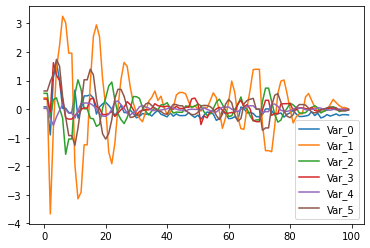

In [6]:
import matplotlib.pyplot as plt

for i in range(6):
    df[f'Var_{i+1}'].iloc[0].plot(label=f'Var_{i}')
plt.legend()

#### From the above data, we can find that the problem is a 4 classification task, ['standing', 'running', 'walking', 'badminton'], 80 samples, 6 variables, ['Var_1', 'Var_2', 'Var_3', 'Var_4', 'Var_5', 'Var_6', ], and each cell contains a time serie with a length of 100.

#### 4. Split train_data and test_data

In [7]:
tb = get_tool_box(df)
train_df, test_df = tb.random_train_test_split(df, test_size=0.2)

#### 5. Configure some parameters and initialize HyperTS. For details, see HyperTS comments.

In [8]:
model = HyperTS(train_data=train_df.copy(),
                mode='dl',
                target='target',
                task=consts.Task_CLASSIFICATION,
                reward_metric=consts.Metric_ACCURACY,
                optimize_direction=consts.OptimizeDirection_MAXIMIZE,
                dl_gpu_usage_strategy=0, # CPU
               )

#### 6. Fit model (Train)

In [9]:
model.fit(max_trials=3)

#### 7. Predict (Infer)

In [10]:
X_test, y_test = model.split_X_y(test_df)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [11]:
y_pred

array(['running', 'standing', 'running', 'badminton', 'walking',
       'standing', 'running', 'badminton', 'badminton', 'running',
       'badminton', 'walking', 'badminton', 'standing', 'walking',
       'walking'], dtype=object)

#### 8. Evaluate results

In [12]:
results = model.evaluate(y_true=y_test, y_pred=y_pred, y_proba=y_proba)

In [13]:
results

,Metirc,Score
0,accuracy,1.0000
1,f1,1.0000
2,precision,1.0000
3,recall,1.0000
